#### Import libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

import plotly.express as px
import random as random
from matplotlib import cm
from matplotlib import colors
import seaborn as sns
from sklearn.cluster import KMeans
import xgboost as xgb



%matplotlib inline

from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGBC
from sklearn.metrics import balanced_accuracy_score as balacc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as rec
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acc
logreg=LogReg (max_iter=500)
rfc=RFC(n_estimators=500)
xgbc=XGBC()
svr=SVR()
from sklearn.preprocessing import RobustScaler



## LOADING DATA

In [2]:
payments = pd.read_csv("payments_fraud.csv")
payments.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


### Columns Description

 - **step**: maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

 - **type**: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

 - **amount**: amount of the transaction in local currency.

 - **nameOrig**: customer who started the transaction.

 - **oldbalanceOrg**: initial balance before the transaction.

 - **newbalanceOrig**: new balance after the transaction.

 - **nameDest**: customer who is the recipient of the transaction.

 - **oldbalanceDest**: initial balance recipient before the transaction. 

 - **newbalanceDest**: new balance recipient after the transaction. 

 - **isFraud**: This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

 - **sFlaggedFraud**: The business model aims to control massive transfers from one account to another and flags illegal attempts.

#### DATA TYPES

In [3]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Exploring & Cleaning Data

In [4]:
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
payments.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


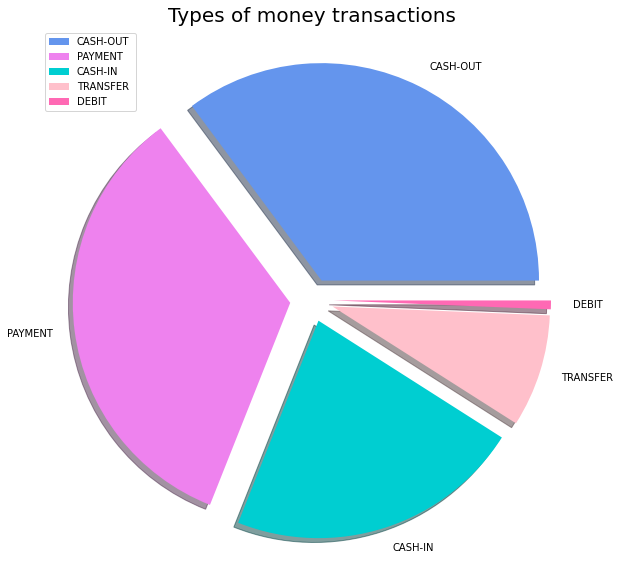

In [6]:
labels = ['CASH-OUT', 'PAYMENT', 'CASH-IN', 'TRANSFER ', 'DEBIT ']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['cornflowerblue', 'violet', 'darkturquoise', 'pink', 'hotpink']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('Types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [7]:
payments.isna().sum() # No hay nulos

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
payments['type'] = payments.type.apply(lambda x : x.replace("_", "-"))

In [9]:
payments.rename(columns={'nameOrig': 'name_Orig','newbalanceOrig': 'new_balance_Orig','oldbalanceOrg': 'old_balance_Org',
                         'oldbalanceDest': 'old_balance_Dest','newbalanceDest': 'new_balance_Dest','isFlaggedFraud': 'is_Flagged_Fraud',
                         'isFraud': 'is_Fraud','nameDest':'name_Dest'}, inplace= True)
                                               

In [10]:
payments.loc[(payments.amount == 0.00)].is_Fraud.value_counts()

1    16
Name: is_Fraud, dtype: int64

In [11]:
payments.loc[(payments.amount > 0.00)].is_Fraud.value_counts()

0    6354407
1       8197
Name: is_Fraud, dtype: int64

As a first insght, we can observe that whenever there's an amount of 0.00 it's fraud. On the other hand we see that for payments greater than cero we have 8197 that are actual fraud and 6354407 that are not fraud.

## Data Analysis

In [12]:
payments.amount.max()

92445516.64

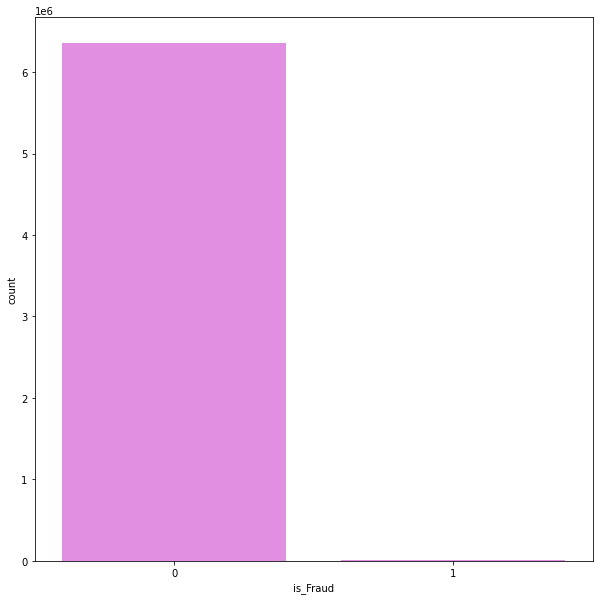

In [13]:
sns.countplot(x="is_Fraud", data=payments, color = 'Violet');

Highest operation in the dataset. Almost 100M.

## Description Statistics

In [14]:
num_attributes = payments.select_dtypes(exclude='object')
cat_attributes = payments.select_dtypes(include='object')

In [15]:
payments.describe()

,step,amount,old_balance_Org,new_balance_Orig,old_balance_Dest,new_balance_Dest,is_Fraud,is_Flagged_Fraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Numerical Attributes

In [16]:
describe = num_attributes.describe().T

#describe['prueba'] = num_attributes.median().tolist()

describe['range'] = (num_attributes.max() - num_attributes.min()).tolist()
describe['variation coefficient'] = (num_attributes.std() / num_attributes.mean()).tolist()
describe['skew'] = num_attributes.skew().tolist()
describe['kurtosis'] = num_attributes.kurtosis().tolist()


describe.T


,step,amount,old_balance_Org,new_balance_Orig,old_balance_Dest,new_balance_Dest,is_Fraud,is_Flagged_Fraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00
range,7.420000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00
variation coefficient,5.847723e-01,3.357344e+00,3.463606e+00,3.419485e+00,3.088194e+00,2.999298e+00,2.781548e+01,6.306051e+02


- All the data has a coeficient of variation greater than 25%, therefore they aren't homogeneous.

- The step variable starts from 1 hour to 742 hour (30 days).

- Some variables are higher shap and right skewed.

- 25% of the newbalanceorig is 0. Maybe there are some transfers that don't go to the destination.

- All data in general has high kurtosis it is telling us that the dataset tend to have heavy tails (outliers).


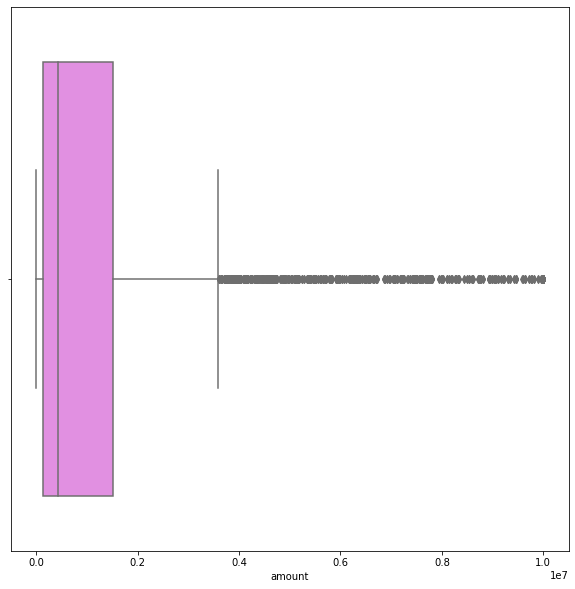

In [17]:
sns.boxplot(x =payments[payments.is_Fraud==1].amount, color='violet');

In the graphic above we can observe from the median that the data doesn't follow a simetric distribution. In this case this follow a positive asimetric distribution wich means that the median is closer to the first quartil.We can see that for data greater than de median the dispersion is higher so there's a higher difference bewteen the amounts values so we say that it is right skewed. 

In [18]:
payments.amount.max()

92445516.64

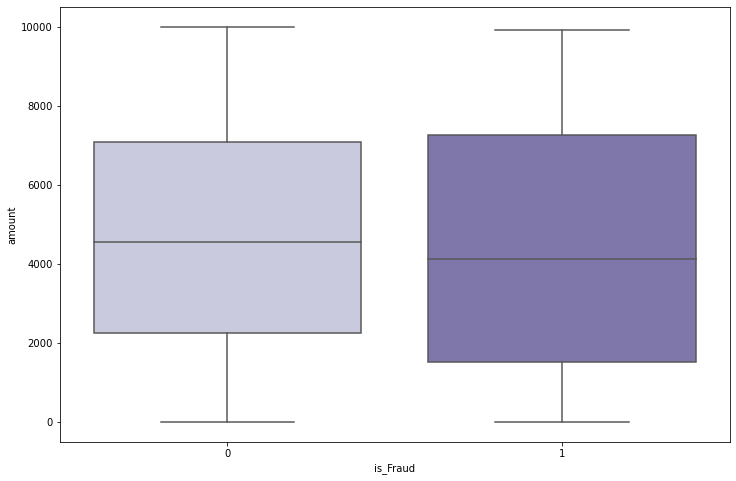

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='is_Fraud', y = 'amount', data = payments[payments.amount < 10000],palette="Purples");


For payments lower than 1e5 we can observe that the data is asimetric for amounts where no fraud exist and the median is closer to low value amounts which is saying that fraud tend to ocurr quite often in smalls amount transfers.Between 0-100k, frauds tend to have larger transactions, with an average of 40k.

### Categorical Attributes

In [20]:
cat_attributes.describe()

,type,name_Orig,name_Dest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH-OUT,C1902386530,C1286084959
freq,2237500,3,113



- The majority type is cash_out with 2237500.

- There's more fraud than the flagged fraud, it shows that the current method can't recognize fraud efficiently.

In [21]:
#payments.corr()

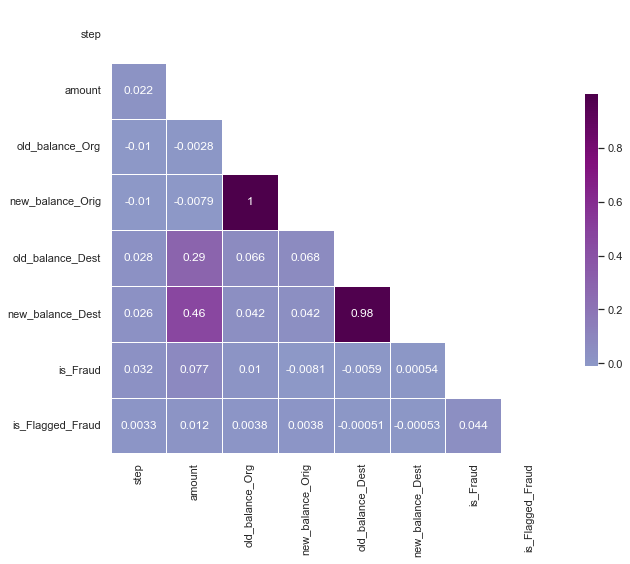

In [22]:

plt.figure(figsize=(10, 10))
sns.set(style='white')
mask=np.triu(np.ones_like(payments.corr(), dtype=bool))
cmap=sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(payments.corr(),
           mask=mask,
          cmap='BuPu',
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5}); 

Things we can conclude from this heatmap:

- OldbalanceOrg and NewbalanceOrg are highly correlated.
- OldbalanceDest and NewbalanceDest are highly correlated.
- There is not much relation between the features, so we need to understand where the relationship between them depends on the type of transaction and amount. 

In [23]:
print('The total number of fraud transaction is {}.'.format(payments.is_Fraud.sum()))
print('The total number of fraud transaction which is marked as fraud {}.'.format(payments.is_Flagged_Fraud.sum()))


The total number of fraud transaction is 8213.
The total number of fraud transaction which is marked as fraud 16.


In [24]:
types_of_payments = payments.type.unique()
types_of_payments

array(['PAYMENT', 'TRANSFER', 'CASH-OUT', 'DEBIT', 'CASH-IN'],
      dtype=object)

- There are five transactions type.

In [25]:
count2 = payments.groupby(by ='type').is_Fraud.count()  # Number of transactions per type.
count2                        

type
CASH-IN     1399284
CASH-OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: is_Fraud, dtype: int64

In [26]:
payments[(payments['type']== 'CASH-OUT')&(payments['amount']== 0)]



,step,type,amount,name_Orig,old_balance_Org,new_balance_Orig,name_Dest,old_balance_Dest,new_balance_Dest,is_Fraud,is_Flagged_Fraud
2736447,212,CASH-OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH-OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH-OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH-OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH-OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH-OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH-OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH-OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH-OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH-OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


In [27]:
payments.groupby(by ='type').is_Fraud.value_counts()

type      is_Fraud
CASH-IN   0           1399284
CASH-OUT  0           2233384
          1              4116
DEBIT     0             41432
PAYMENT   0           2151495
TRANSFER  0            528812
          1              4097
Name: is_Fraud, dtype: int64

Here we can observe that from all transactions made with different methos CASH-OUT AND TRANSFER are more likely to fraud. 

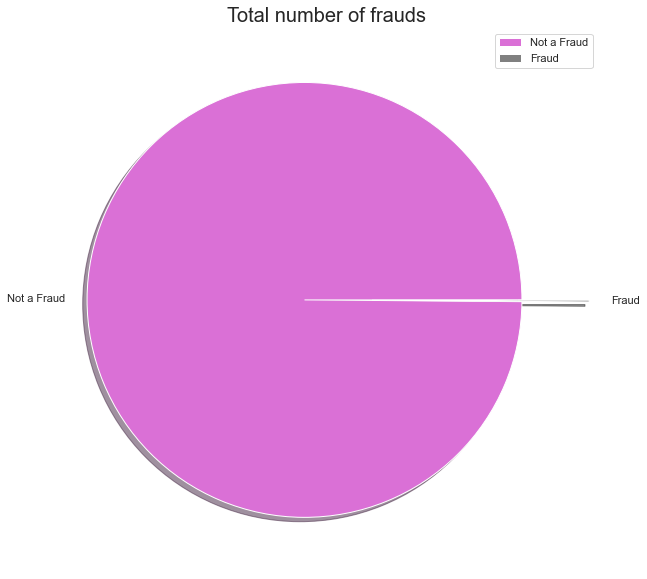

In [28]:
labels = ['Not a Fraud', 'Fraud']
colors = ['orchid', 'gray']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('Total number of frauds',fontsize = 20)
plt.legend()
plt.show()

In [29]:
payments.is_Fraud.value_counts()

0    6354407
1       8213
Name: is_Fraud, dtype: int64

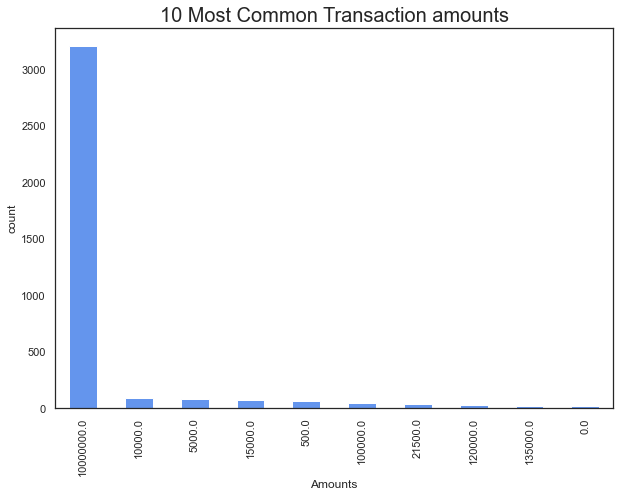

In [30]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (10, 7)

payments['amount'].value_counts().head(10).plot.bar(color = 'cornflowerblue')
plt.title('10 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()


In [31]:
# figuring out the fraud transfer and fraud cash outs
fraudTransfer = payments.loc[(payments.is_Fraud == 1) & (payments.type == 'TRANSFER')]
fraudCashout = payments.loc[(payments.is_Fraud == 1) & (payments.type == 'CASH-OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(fraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(fraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


- If we take a look at the pie chart we could hesitate to say that since there are more transactions in DEBIT, TRANSFER AND PAYMENT types. 
- If we go deeper and drill down each type we see that the type of payments with more actual frauds are CASH OUT followed by TRANSFER. 

In [32]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("TRANSFER Transaction")

print("Minimum Transaction :", payments.loc[(payments.is_Fraud == 1) & (payments.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", payments.loc[(payments.is_Fraud == 1) & (payments.type == 'TRANSFER')].amount.max())

print("CASH-OUT Transaction")

print("Minimum Transaction :", payments.loc[(payments.is_Fraud == 1) & (payments.type == 'CASH-OUT')].amount.min())
print("Maximum Transaction :", payments.loc[(payments.is_Fraud == 1) & (payments.type == 'CASH-OUT')].amount.max())

TRANSFER Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0
CASH-OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


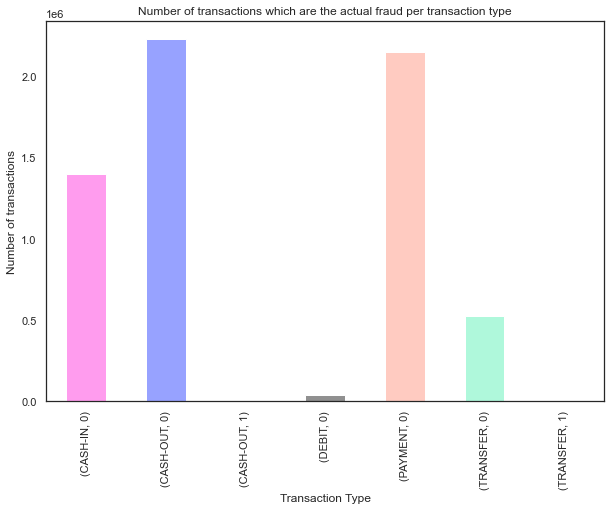

In [33]:
# fraud 
colors = ['#FF9CEE', '#97A2FF', '#D5AAFF','#909090','#FFCBC1','#AFF8DB','#C1CD97']
ax = payments.groupby(['type', 'is_Fraud']).size().plot(kind='bar',color = colors)
ax.set_title("Number of transactions which are the actual fraud per transaction type")
ax.set_xlabel("Transaction Type")
ax.set_ylabel("Number of transactions");






In [34]:
payments.groupby(by= 'is_Fraud').amount.count()

is_Fraud
0    6354407
1       8213
Name: amount, dtype: int64

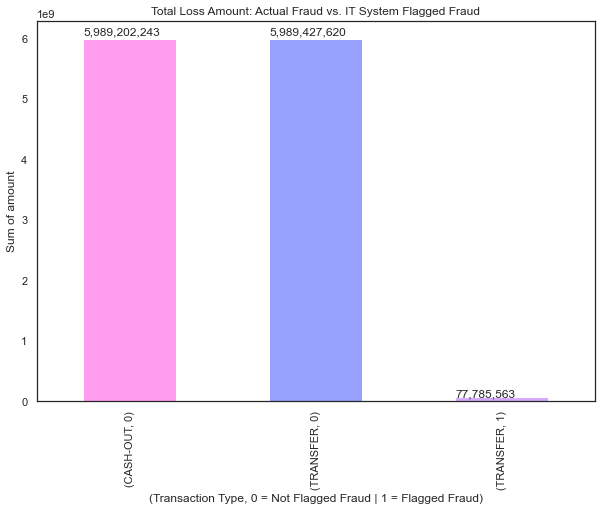

In [35]:
colors = ['#FF9CEE', '#97A2FF', '#D5AAFF']

ax = payments[payments['is_Fraud'] ==1].groupby(['type', 'is_Flagged_Fraud'])['amount'].sum().plot(kind='bar',color = colors)
# ax = raw_data[raw_data['isFraud'] ==1].groupby(['type', 'isFlaggedFraud'])['amount'].mean().plot(kind='bar')
# ax = raw_data.groupby(['type', 'isFlaggedFraud'])['amount'].mean().plot(kind='bar')
ax.set_title("Total Loss Amount: Actual Fraud vs. IT System Flagged Fraud")
ax.set_xlabel("(Transaction Type, 0 = Not Flagged Fraud | 1 = Flagged Fraud)")
ax.set_ylabel("Sum of amount")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
                                                                                                

Ratio of detected fraud amount over total fraud amount is :
77,785,563 / (5,989,202,242 + 5,989427620 + 77,785,563) = 0.64518 %




In [36]:
grouped_multiples = payments.groupby(['type', 'is_Fraud']).amount.sum()
grouped_multiples

type      is_Fraud
CASH-IN   0           2.363674e+11
CASH-OUT  0           3.884238e+11
          1           5.989202e+09
DEBIT     0           2.271992e+08
PAYMENT   0           2.809337e+10
TRANSFER  0           4.792248e+11
          1           6.067213e+09
Name: amount, dtype: float64

In [37]:
suspicious_amount = payments.groupby(by ='type').is_Fraud.value_counts()
suspicious_amount

type      is_Fraud
CASH-IN   0           1399284
CASH-OUT  0           2233384
          1              4116
DEBIT     0             41432
PAYMENT   0           2151495
TRANSFER  0            528812
          1              4097
Name: is_Fraud, dtype: int64

In [38]:
grouped_multiple = payments.groupby(['type', 'is_Flagged_Fraud']).amount.sum()
grouped_multiple

type      is_Flagged_Fraud
CASH-IN   0                   2.363674e+11
CASH-OUT  0                   3.944130e+11
DEBIT     0                   2.271992e+08
PAYMENT   0                   2.809337e+10
TRANSFER  0                   4.852142e+11
          1                   7.778556e+07
Name: amount, dtype: float64

In [39]:
payments.head() 

,step,type,amount,name_Orig,old_balance_Org,new_balance_Orig,name_Dest,old_balance_Dest,new_balance_Dest,is_Fraud,is_Flagged_Fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH-OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


- We can observe that fraudulent transactions tend to be of smaller amounts. On the other hand, we confirm that frauds behave in the same way for both transfers and cash out. 
Not only in frauds, but also in non-fraudulent transactions.

### Analysis of fraudelent transactions 


- Since Transfer and Cash-out are more suceptible to fraud I will keep information about this two in order to make predictions. 

In [40]:
fraud_payments = payments.loc[(payments.type == 'TRANSFER') | (payments.type == 'CASH-OUT')]

In [41]:
fraud_payments

,step,type,amount,name_Orig,old_balance_Org,new_balance_Orig,name_Dest,old_balance_Dest,new_balance_Dest,is_Fraud,is_Flagged_Fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH-OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH-OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH-OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH-OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [42]:
fraud_payments.groupby(by ='type').step.value_counts()

type      step
CASH-OUT  19      19822
          18      19440
          187     18646
          235     18494
          139     17980
                  ...  
TRANSFER  721         2
          725         2
          729         2
          112         1
          662         1
Name: step, Length: 1486, dtype: int64

In [43]:
fraud_payments.loc[fraud_payments.type == 'TRANSFER', 'type'] = 0
fraud_payments.loc[fraud_payments.type == 'CASH-OUT', 'type'] = 1
fraud_payments.type = fraud_payments.type.astype(int)

# MACHINE LEARNING 


In [44]:
fraud_payments_copy = fraud_payments.copy()

In [45]:
fraud_payments_copy.head()

,step,type,amount,name_Orig,old_balance_Org,new_balance_Orig,name_Dest,old_balance_Dest,new_balance_Dest,is_Fraud,is_Flagged_Fraud
2,1,0,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,0,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,0,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [46]:
fraud_payments_copy= fraud_payments.copy()

In [72]:
X = fraud_payments_copy.drop(columns=['is_Fraud', 'is_Flagged_Fraud', 'name_Orig', 'name_Dest', 
                      'step'], axis=1)[:1000000]

In [73]:
X.head()

,type,amount,old_balance_Org,new_balance_Orig,old_balance_Dest,new_balance_Dest
2,0,181.00,181.0,0.0,0.0,0.00
3,1,181.00,181.0,0.0,21182.0,0.00
15,1,229133.94,15325.0,0.0,5083.0,51513.44
19,0,215310.30,705.0,0.0,22425.0,0.00
24,0,311685.89,10835.0,0.0,6267.0,2719172.89


In [74]:
y = fraud_payments_copy['is_Fraud'][:1000000]

In [75]:
data = pd.concat([X, y], axis=1)

## Test Train Split

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

## Training and Predicting

In [53]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [77]:
modelos=[logreg, xgbc]

modelos_name=['LogReg','xgbc']

balacc_score=[]
prec_score=[]
rec_score=[]
f1_score=[]
acc_score=[]
for i,m in enumerate(modelos):
    m.fit(X_train, y_train)
    y_pred=m.predict(X_test)
    acc_score.append(acc(y_test, y_pred))
    prec_score.append(prec(y_test, y_pred))
    rec_score.append(rec(y_test, y_pred))
    f1_score.append(f1(y_test, y_pred))
    print(modelos_name[i])
analisis= pd.DataFrame({"modelos" : modelos_name, "acc_score" : acc_score, "prec_score" : prec_score, "rec_score" : rec_score, "f1_score" : f1_score})
analisis

LogReg
xgbc


,modelos,acc_score,prec_score,rec_score,f1_score
0,LogReg,0.998465,0.673786,0.713992,0.693307
1,xgbc,0.999345,0.965879,0.757202,0.848904


## Conclussions 

- Existing rule-based system is not capable of detection of all the fraud transaction.

- Machine learning can be used for the detection of fraud transaction.

- Predictive models produce good precision score and are capable of detection of fraud transaction.